### Linear Regression, misconceptions and facts - Author: Akshay Bhasme (akshaybhasme30@gmail.com)

# This notebook helps you understand about Linear Regression (OLS) and the misconceptions with it like:
####  1) Linear Regression (OLS) uses gradient descent algorithm to optimize the weights and intercept.
####  2) Feature Scaling will improve the results and performance metrics of the model.

# and proves the facts like: 
####  1) Feature contributions that drive your target value will be same in both cases- scaled and non-scaled.
####  2) Interpretation of the scores of linear regression(OLS) in scaled response (target) variable can mislead you .

In [1]:
# Importing required libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,median_absolute_error,mean_absolute_error,max_error,explained_variance_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import itertools
from tqdm import tqdm
from sklearn.linear_model import SGDRegressor

# 1. Let's start with our first misconception about OLS, that it uses Gradient Descent to train and optimize the weights or coefficients. 
#### Let's explore the OLS method of calculating coefficients and compare it with Sklearn- Linear Regression() implementation results.

## Understanding Ordinary Least Squares (OLS) Regression:

**Introduction**

   Ordinary Least Squares (OLS) regression is a foundational technique that holds immense importance in understanding the relationships between variables. Whether you're a data enthusiast, researcher, or a business analyst, comprehending OLS is essential. In this notebook, we'll delve into the core concepts of OLS, its computational process for optimizing coefficients and intercepts, and provide a sample example for a clearer understanding.

**Understanding OLS**

OLS is a statistical method used to find the best-fitting linear relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (predictors or individual variables). The goal of OLS is to minimize the sum of squared differences between the actual observed values and the values predicted by the linear model.

Mathematical Formulation

Let's break down the fundamental components of the OLS model using a simple example:

Suppose we have a dataset with pairs of observations (x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ), where x represents the independent variable and y represents the dependent variable. The linear relationship between x and y can be expressed as:

y = β₀ + β₁x + ε

* y: Dependent variable (response)
* x: Independent variable (predictor)
* β₀: Intercept (y-intercept)
* β₁: Coefficient of x (slope)
* ε: Error term (residual)
Optimizing Coefficients and Intercept

The primary objective of OLS is to find the values of β₀ and β₁ that minimize the sum of squared residuals. The residual for each observation is the difference between the observed y and the predicted y based on the linear equation. Mathematically, the sum of squared residuals is minimized by finding the values of β₀ and β₁ that satisfy the following equations:

∂(Sum of squared residuals) / ∂β₀ = 0
∂(Sum of squared residuals) / ∂β₁ = 0

## How OLS calculates coeffiecients? and not Optimizes. 

Let's assume you have n data points and p independent variables (features). The data can be represented as follows:

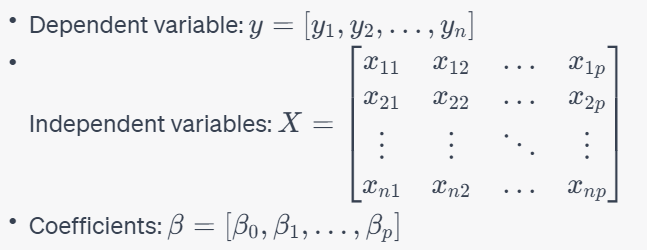

### Step1 : Matrix Representation:

Add a column of ones to the independent variables matrix to account for the intercept term:
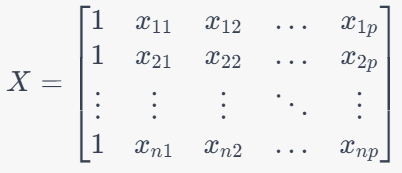

### Step2 : Formulation & Solving the equation by putting the values:
If we are given some data as pairs of (X, y), we can construct a set of equations of the form:

[f0(Xi),f1(Xi),...,fn(Xi)]⋅[β0,β1,...,βn]T=yi

There will be one of these equations for every data point, so we end up with a matrix equation that looks like:

###  X$.$β=y

There are usually more data points than in the vector of β, so the shapes of these arrays are not suitable to solve directly. You can of course set up an objective function and use scipy.optimize.minimize, but there is a better approach.

To be a little more specific, suppose we have n pairs of (X,y) data points, and we want to fit a model containing p parameters. Then, the dimensions of the X will be (n,p), the dimensions of β will be (p,1), and the dimensions of y will be (n,1). 


We can modify the equation though if we 'left multiply' each side of the equation by $X^{T}$ (X_transpose)

- ($X^{T}$) $.$ X $.$ β = ($X^{T}$) $.$ y

- β = $(X . X^{T})^{-1}$ $.$ $X^{T}$ $.$ y


Here in this step, NumPy function np.linalg.inv comes handy to get this $(X . X^{T})^{-1}$ part of the function. np.linalg.inv is a function from the NumPy linear algebra module that calculates the matrix inverse.

### Now let's see the implementation of all these steps using python

In [2]:
data= pd.read_csv('Advertising.csv')
data.head()

,Week,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### OLS method of calculating the weights/coefficients.

In [3]:
import numpy as np

# Data
data= pd.read_csv('Advertising.csv') #sample data taken from-  https://github.com/yyviolin52/Media-Mix-Modeling/blob/main/Advertising.csv
data.head()

y= data.sales
X= data.drop(['sales','Week'], axis=1)

# Step1: Matrix Representation: Add a column of ones for intercept
X_with_intercept = np.c_[np.ones(len(y)), X]

In [4]:
# Step2: Formulation & Solving the equation by putting the values
    
coeffs = np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept)).dot(X_with_intercept.T).dot(y)

# Calculate intercept separately
intercept = coeffs[0]

# Calculate the final coefficients
final_coeffs = coeffs[1:]

print("Scratch Implemented OLS Coefficients:", final_coeffs)
print("Scratch Implemented OLS Intercept:", intercept)


Scratch Implemented OLS Coefficients: [ 0.04576465  0.18853002 -0.00103749]
Scratch Implemented OLS Intercept: 2.9388893694594476


### Now lets check with sklearn implementation of Linear Regression and compare with scratch implemented OLS results:

In [5]:
data= pd.read_csv('Advertising.csv')
data.head()

,Week,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
lr= LinearRegression()
lr.fit(X,y)
y_pred= lr.predict(X)

In [7]:
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [8]:
lr.intercept_

2.9388893694594067

In [9]:
print("Scratch Implemented OLS Coefficients:", final_coeffs)
print("sklearn Implemented OLS Coefficients:", lr.coef_)
print('*********************************************')
print("Scratch Implemented OLS Intercept:", intercept)
print("sklearn Implemented OLS Intercept:", lr.intercept_)


Scratch Implemented OLS Coefficients: [ 0.04576465  0.18853002 -0.00103749]
sklearn Implemented OLS Coefficients: [ 0.04576465  0.18853002 -0.00103749]
*********************************************
Scratch Implemented OLS Intercept: 2.9388893694594476
sklearn Implemented OLS Intercept: 2.9388893694594067


### You witnessed the process of calculating coefficients without any gradient descent algorithm in OLS. It doesn't rely on any Gradient Descent kind of algorithm to optimize the weights.
For reference: https://kitchingroup.cheme.cmu.edu/f19-06623/18-linear-regression.html

# 2. Now let's clear our second misconception i.e.  Feature Scaling will improve the results and performance metrics of the model.

**The implementation of Linear Regression with scaling of the individial features and without scaling them is given below.**

## Linear Regression without Scaling

In [10]:
data= pd.read_csv('Advertising.csv')
data.head()

,Week,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
y= data.sales
X= data.drop(['sales','Week'], axis=1)

In [12]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [14]:
lr= LinearRegression()
lr.fit(X,y)
y_pred= lr.predict(X)

In [15]:
rmse= mean_squared_error(y,y_pred,squared=True)
r2= r2_score(y,y_pred)
mape= mean_absolute_percentage_error(y,y_pred)
print('RMSE = ',rmse)
print('R-square = ', r2)
print('MAPE = ', mape)

RMSE =  2.784126314510936
R-square =  0.8972106381789522
MAPE =  0.1387784709045716


In [16]:
coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table

,0,Coefs
0,TV,0.045765
1,radio,0.188530
2,newspaper,-0.001037


In [17]:
lr.intercept_

2.9388893694594067

In [18]:
# Contribution
base= len(y)*lr.intercept_
contri_dict= {} 
for key,value in zip(coef_table[0],coef_table.Coefs):
    contri_dict[key]= X[key].sum() * value

In [19]:
print('Total Sales= ',y.sum())
print('Baseline = ',base)
print('TV Contribution= ',contri_dict['TV'])
print('Radio Contribution= ',contri_dict['radio'])
print('NewsPaper Contribution= ',contri_dict['newspaper'])

Total Sales=  2804.5
Baseline =  587.7778738918813
TV Contribution=  1345.8695758750605
Radio Contribution=  877.1924627170226
NewsPaper Contribution=  -6.33991248396427


In [20]:
sum(contri_dict.values())+ base

2804.5

## Linear Regression with Scaling Independent Variables

In [21]:
data= pd.read_csv('Advertising.csv')
data.head()

,Week,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
y= data.sales
X= data.drop(['sales','Week'], axis=1)

In [23]:
scaler= MinMaxScaler()
X_scaled= scaler.fit_transform(X)
X_scaled=  pd.DataFrame(data= X_scaled, columns=X.columns)
X_scaled.head()

,TV,radio,newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994


In [24]:
lr= LinearRegression()
lr.fit(X_scaled,y)
y_pred= lr.predict(X_scaled)

In [25]:
rmse= mean_squared_error(y,y_pred,squared=True)
r2= r2_score(y,y_pred)
mape= mean_absolute_percentage_error(y,y_pred)
print('RMSE = ',rmse)
print('R-square = ', r2)
print('MAPE = ', mape)

RMSE =  2.784126314510936
R-square =  0.8972106381789522
MAPE =  0.13877847090457163


In [26]:
coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table

,0,Coefs
0,TV,13.532606
1,radio,9.351089
2,newspaper,-0.117963


In [27]:
lr.intercept_

2.970613373365447

In [28]:
# Contribution
base= len(y)*lr.intercept_
contri_dict= {} 
for key,value in zip(coef_table[0],coef_table.Coefs):
    contri_dict[key]= X_scaled[key].sum() * value

In [29]:
print('Total Sales= ',y.sum())
print('Baseline = ',base)
print('TV Contribution= ',contri_dict['TV'])
print('Radio Contribution= ',contri_dict['radio'])
print('NewsPaper Contribution= ',contri_dict['newspaper'])

Total Sales=  2804.5
Baseline =  594.1226746730895
TV Contribution=  1339.4625255113035
Radio Contribution=  877.1924627170223
NewsPaper Contribution=  -6.277662901415356


In [30]:
sum(contri_dict.values())+ base

2804.5

### You can check the Performance metrics (scores) on both the models i.e. scaling and not-scaled. Both models have same predicting power, giving same scores for r2, rmse and mape. 

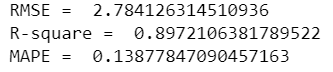   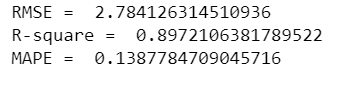


### So it clears out misconception that 'Feature Scaling will improve the results and performance metrics of the model'.

# Fact 1: Feature contributions which drives your target value will be same in both cases- scaled and non-scaled.

### If you check the above two implementations, not only predicting power, but every feature also contributes almost same in both models with small noise.

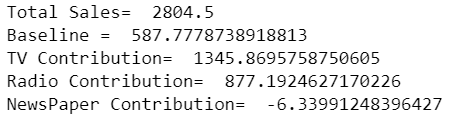    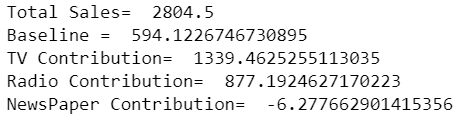

### So it proves our first fact i.e. 'Feature contributions that drive your target value will be same in both cases- scaled and non-scaled'.


# Fact 2: Interpretation of the scores of the model in scaled response (target) variable can mislead you.

In [31]:
data= pd.read_csv('Advertising.csv')
data.head()

,Week,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [32]:
y= data.sales
X= data.drop(['sales','Week'], axis=1)

In [33]:
y_scaler=MinMaxScaler()
y_scaled= y_scaler.fit_transform(np.array(y).reshape(-1,1))

In [34]:
y_scaled[:5]

array([[0.80708661],
       [0.34645669],
       [0.30314961],
       [0.66535433],
       [0.44488189]])

In [35]:
lr= LinearRegression()
lr.fit(X,y_scaled)
y_pred= lr.predict(X)

In [36]:
rmse= mean_squared_error(y_scaled,y_pred,squared=True)
r2= r2_score(y_scaled,y_pred)
mape= mean_absolute_percentage_error(y_scaled,y_pred)
print('RMSE = ',rmse)
print('R-square = ', r2)
print('MAPE = ', mape)

RMSE =  0.004315404418300788
R-square =  0.8972106381789521
MAPE =  7826056760250.655


In [37]:
y_unscaled= y_scaler.inverse_transform(y_scaled)
y_pred_unscaled= y_scaler.inverse_transform(y_pred)

In [38]:
rmse= mean_squared_error(y_unscaled,y_pred_unscaled,squared=True)
r2= r2_score(y_unscaled,y_pred_unscaled)
mape= mean_absolute_percentage_error(y_unscaled,y_pred_unscaled)
print('RMSE = ',rmse)
print('R-square = ', r2)
print('MAPE = ', mape)

RMSE =  2.784126314510936
R-square =  0.8972106381789521
MAPE =  0.1387784709045716


### The scores of the model where your target variable is scaled one, should be carefully interpreted. See the below scores are calculated before inverse scaling of y and y_pred:

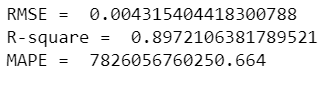

### Looking at the above scores you may end up with conclusion that RMSE and r2 scores are coming very good, so this is our best model. 
# But a big-  NO, its wrong.
### As the model is trained on 'scaled y' target, it doesn't represents the original 'y'. Hence we should always do the inverse scaling on 'y' and 'y_pred' and then calculate the scores. It is always better to check more than one performance metric to get the model performance. Below are the correct scores calculated after inverse scaling:

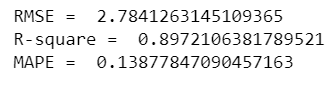

# Thanks!
## Happy Learning :)